<a href="https://colab.research.google.com/github/Fredrick-Ofodongoro/AI_labs/blob/main/A_122181.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Classification

# Data Importing 

In [6]:
import pandas as pd     # Pandas is a library for data manipulation and analysis, we use hear to read our data in CSV format
import numpy as np      # Numpy is a library for scientific computing, we use it to perform mathematical operations on our data
import seaborn as sns

# Read in our data
Clustering_df = pd.read_csv('/content/drive/MyDrive/Clustering_Data.csv')        # Read in our data from the CSV file
Clustering_df.head()       

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [11]:
# We can do some basic analysis on our data,however for this task the key thing to take note of would be hte number of rows and columns in our data
print(Clustering_df.shape )                           # Returns the number of rows and columns in our data

(1500, 17)


In [12]:
for col in Clustering_df.columns:
    print(col)

Gender
Age
Height
Weight
family_history_with_overweight
FAVC
FCVC
NCP
CAEC
SMOKE
CH2O
SCC
FAF
TUE
CALC
MTRANS
NObeyesdad


# Data Preparation

In [17]:
print(Clustering_df.info())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1500 non-null   int64  
 1   Age                             1500 non-null   float64
 2   Height                          1500 non-null   float64
 3   Weight                          1500 non-null   float64
 4   family_history_with_overweight  1500 non-null   int64  
 5   FAVC                            1500 non-null   int64  
 6   FCVC                            1500 non-null   float64
 7   NCP                             1500 non-null   float64
 8   CAEC                            1500 non-null   int64  
 9   SMOKE                           1500 non-null   int64  
 10  CH2O                            1500 non-null   float64
 11  SCC                             1500 non-null   int64  
 12  FAF                             15

In [ ]:
#handling missing values couldf be doine by igoring the given row. Given that there are 1500 datasets, ignoring one woouldn't be the worst idea 

In [ ]:
# Encoding:
from sklearn.preprocessing import LabelEncoder
#the 2 main uses of labelencoding is to 
#normaliise labels 
#transform non-numerical information to numerical values 


In [13]:
Clustering_df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.515333,23.756946,1.691518,73.955039,0.743333,0.838000,2.306708,2.606451,1.802000,0.021333,1.991569,0.064000,1.091599,0.695952,2.325333,2.296667,2.822667
std,0.499932,6.874143,0.096336,18.579708,0.436940,0.368574,0.520360,0.873891,0.545583,0.144541,0.618542,0.244835,0.900229,0.661538,0.563060,1.319779,2.261850
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,1.620000,59.610795,0.000000,1.000000,2.000000,2.090284,2.000000,0.000000,1.602947,0.000000,0.154524,0.000000,2.000000,2.000000,1.000000
50%,1.000000,21.685022,1.699999,75.054688,1.000000,1.000000,2.012719,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.687271,2.000000,3.000000,2.000000
75%,1.000000,25.000000,1.760000,85.014803,1.000000,1.000000,2.909031,3.000000,2.000000,0.000000,2.387424,0.000000,1.992956,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


# Clustering  
k = 5

In [24]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt




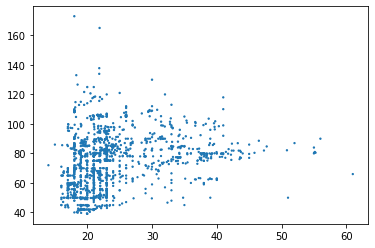

In [32]:
plt.scatter(Clustering_df['Age'], Clustering_df['Weight'], Clustering_df['Height'])

In [39]:
kMeans = KMeans(n_clusters = 5)
kMeans.fit(Clustering_df)
print(kMeans.cluster_centers_)

[[2.26586103e-01 2.02149045e+01 1.64242539e+00 4.93867366e+01
  4.04833837e-01 7.85498489e-01 2.37793205e+00 2.77730787e+00
  1.49848943e+00 1.51057402e-02 1.79110119e+00 1.05740181e-01
  1.13518001e+00 8.53459952e-01 2.35951662e+00 2.81873112e+00
  3.71601208e-01]
 [9.39698492e-01 2.44161131e+01 1.78821561e+00 1.05278722e+02
  9.84924623e-01 9.44723618e-01 2.23249162e+00 2.59098036e+00
  1.92964824e+00 3.01507538e-02 2.30914279e+00 1.00502513e-02
  1.23963700e+00 8.89738970e-01 2.29145729e+00 2.37688442e+00
  2.69346734e+00]
 [6.34529148e-01 2.22298376e+01 1.71872064e+00 8.28622477e+01
  9.08071749e-01 8.92376682e-01 2.24090377e+00 2.53109359e+00
  1.88340807e+00 1.79372197e-02 2.05062270e+00 2.69058296e-02
  1.08870396e+00 6.99251135e-01 2.24887892e+00 2.61210762e+00
  4.22421525e+00]
 [3.18435754e-01 3.81190442e+01 1.65751034e+00 7.95029394e+01
  8.99441341e-01 8.82681564e-01 2.36893196e+00 2.47962444e+00
  1.91061453e+00 1.67597765e-02 1.86283749e+00 2.79329609e-02
  8.09001592e-01

In [41]:
Clustering_df['New Cluster'] = kMeans.labels_
Clustering_df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,New Cluster
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,4
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,2
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6,2


# kNN Classification

In [43]:
Classification_df = pd.read_csv('/content/drive/MyDrive/Classification_Data.csv')
Classification_df.head() 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.481032,1.661277,90.744965,1,1,1.712848,3.0,2,0,1.162153,0,0.458981,0.885532,3,0,2
1,1,29.000000,1.641784,89.424947,1,1,1.330700,3.0,2,0,1.880967,0,0.322013,0.000000,2,0,2
2,1,27.968765,1.673767,89.995034,1,1,1.961069,3.0,2,0,2.652327,0,0.569310,0.319008,2,0,2
3,0,18.024744,1.617192,83.121811,1,1,2.976509,3.0,2,0,1.022705,0,1.025690,0.313016,3,3,2
4,0,18.106820,1.602129,82.412665,1,1,2.319648,3.0,2,0,1.107164,0,0.692123,0.304020,3,3,2


In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 7,  metric = 'minkowski', p = 2)
#im 


from a bit of research [kNN](https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/) shows the types of distances and p=2 will prompt the use of Euclidean

1. p = 1 , Manhattan Distance
2. p = 2 , Euclidean Distance
3. p = infinity , Cheybchev Distance

In [104]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(Clustering_df, test_size=0.25)
train_x = train.drop('New Cluster', axis = 1)
train_y = train['New Cluster']
test_x = test.drop('New Cluster', axis = 1)
test_y = test['New Cluster']

In [105]:
knn_clf.fit(train_x, train_y)
predictions = knn_clf.predict(test_x)
from sklearn.metrics import accuracy_score


print(accuracy_score(test_y, predictions))

0.984
